# Baby Names

This dataset contains information on how many babies were born with each name. Both the raw number and proportion of births for the year are included.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/zgulde/tidytuesday/master/data/2022/2022-03-22/babynames.csv'
df = pd.read_csv(url)
df.head()

,year,sex,name,n,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020521
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017888


- What were the 10 most popular names the year you were born?
- What year was your name the most popular?
- Where does your name rank for the year that you were born?
- Does your name increase or decrease in popularity compared to the year after the year you were born? The year before? What about 5 years before/after?
- Visualize your name's popularity over time.

In [4]:
df.loc[df.year == 2015, ['name', 'n']].sort_values(by='n').tail(10)

,name,n
1826123,Isabella,15594
1845197,William,15889
1845196,Jacob,15938
1826122,Ava,16361
1845195,Mason,16610
1826121,Sophia,17402
1845194,Liam,18355
1845193,Noah,19613
1826120,Olivia,19669
1826119,Emma,20435


In [19]:
df[df.name == 'Ryan'].groupby('year').n.sum().sort_values().tail(5)

year
1987    29176
1984    29263
1990    29699
1986    30212
1985    30465
Name: n, dtype: int64

In [25]:
# np.random.seed(123)

# df = pd.DataFrame({'x': np.random.randn(10)})
# df['rank'] = df.x.rank(ascending=False)
# df

,x,rank
0,-1.085631,8.0
1,0.997345,3.0
2,0.282978,4.0
3,-1.506295,9.0
4,-0.578600,6.0
5,1.651437,1.0
6,-2.426679,10.0
7,-0.428913,5.0
8,1.265936,2.0
9,-0.866740,7.0


In [33]:
some_subset = df[df.year == 2015].copy()
some_subset['new_column'] = 'a'

In [34]:
year_2015 = df[df.year == 2015].copy()
year_2015['rank'] = year_2015.n.rank(ascending=False)
year_2015[year_2015.name == 'Ryan']

,year,sex,name,n,prop,rank
1826591,2015,F,Ryan,678,0.000349,921.0
1845231,2015,M,Ryan,8521,0.004180,55.0


(1960.0, 2020.0)

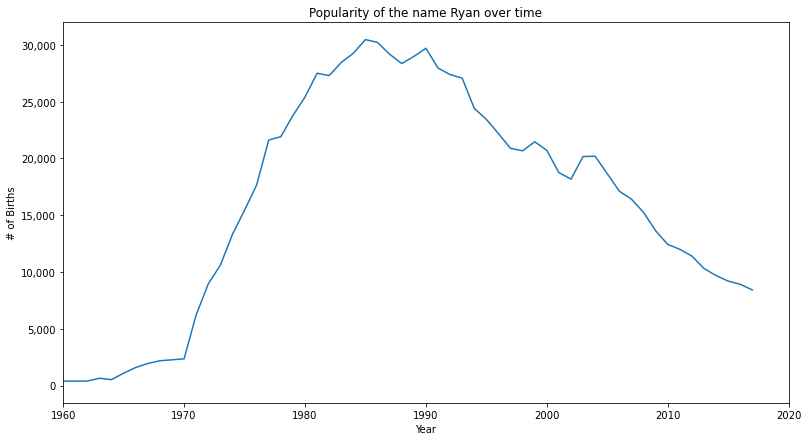

In [46]:
plt.figure(figsize=(13, 7))
subset = df[df.name == 'Ryan']
subset = subset.groupby('year').n.sum()
plt.plot(subset.index, subset)
plt.xlabel('Year')
plt.ylabel('# of Births')
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.title('Popularity of the name Ryan over time')
plt.xlim(1960, 2020)

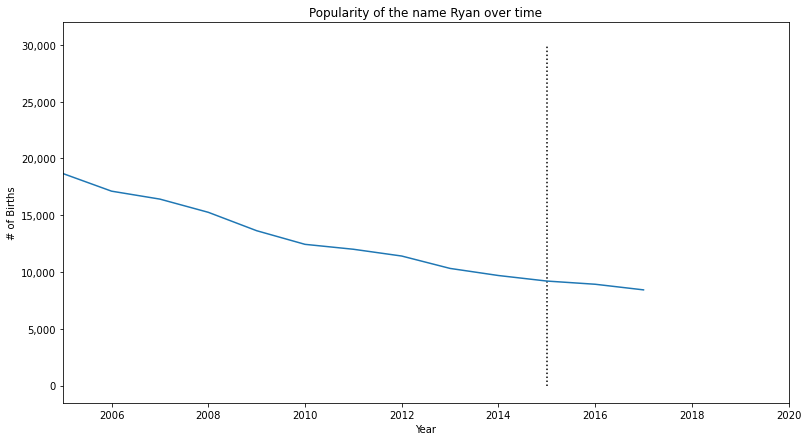

In [48]:
plt.figure(figsize=(13, 7))
subset = df[df.name == 'Ryan']
subset = subset.groupby('year').n.sum()
plt.plot(subset.index, subset)
plt.xlabel('Year')
plt.ylabel('# of Births')
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.title('Popularity of the name Ryan over time')
plt.xlim(2005, 2020)
plt.vlines(2015, 0, 30_000, color='black', ls=':')